### Feature Extraction using PCA

Explained Variance  [7.53990479 2.58094839 2.1015236  1.93591903 1.69405374 1.5432673 ] 

Explained Variance Ratio  [0.30136419 0.10315852 0.08399628 0.07737719 0.06771002 0.06168321] 



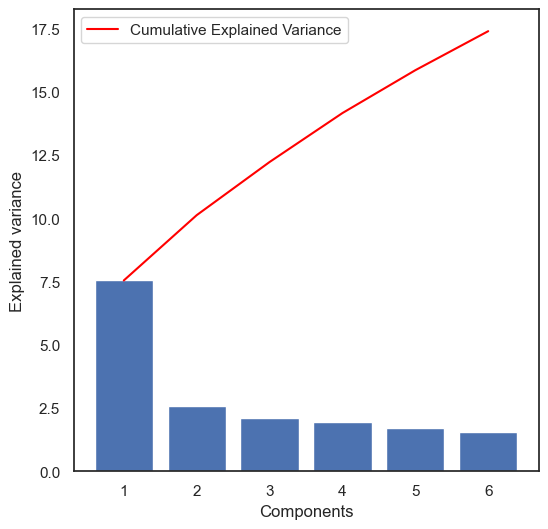

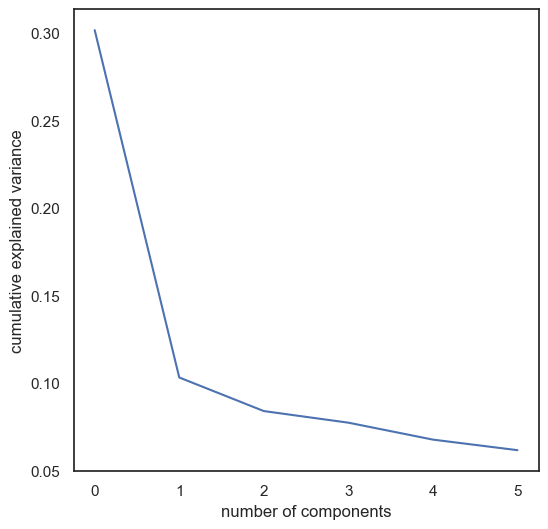

TRAINING DATA
Mean absolute error =  13.560501020190827
Root mean square error =  20.311101757984083
Rsquare score = 76.0 

VALIDATION DATA
Mean absolute error =  12.164831941840626
Root mean square error =  15.81371397874789
Rsquare score = 85.0 

TESTING DATA
Mean absolute error =  11.809522245278044
Root mean square error =  15.317466146040438
Rsquare score = 84.0 

COMPLETE DATA
Mean absolute error =  13.245836234864528
Root mean square error =  19.45514110954278
Rsquare score = 78.0 



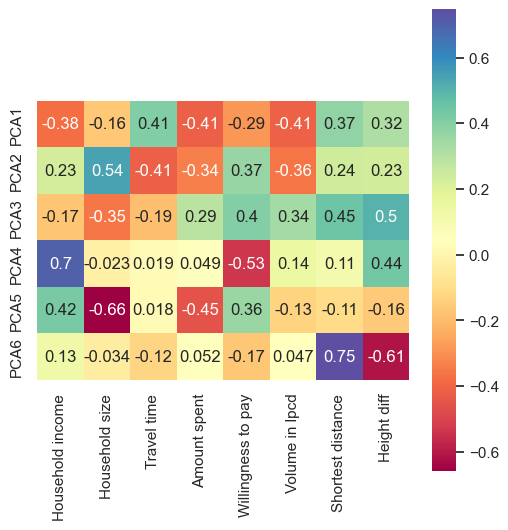

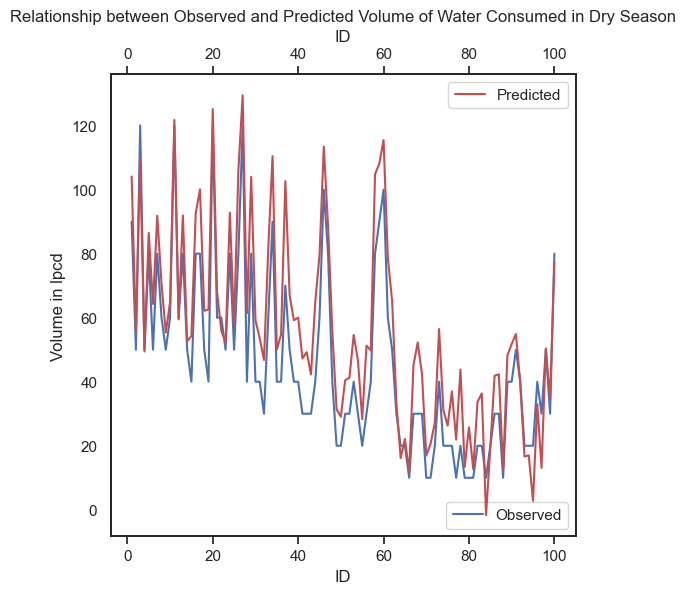

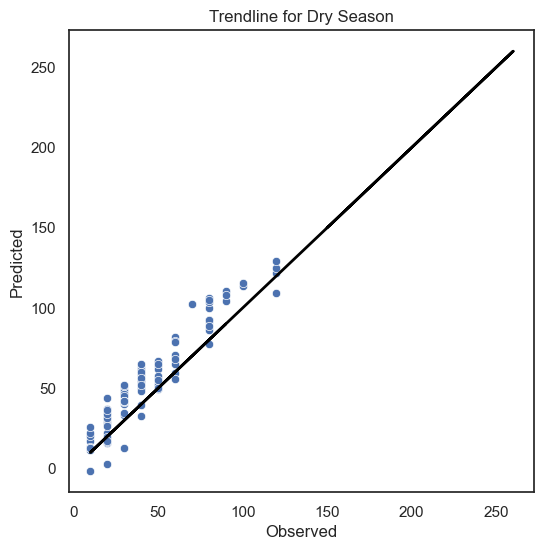

In [11]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding
data = pd.read_csv("dry_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = [ 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

data_new2 = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Method_carried',
            'Method_delivered',
            'Method_inyard',
            'Method_waterboard',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'Quality_poor'], axis=1)

#print(data_new.head())

# Principal Component Analysis
def pca(n_components, data_new):
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled = StandardScaler().fit_transform(data_new)
    Xscaled = pd.DataFrame(Xscaled, columns=['ID', 
            'Household income',
            'Education',
            'Household size',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Shortest distance',
            'Height diff',
            'Method_carried',
            'Method_delivered',
            'Method_inyard',
            'Method_waterboard',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'Quality_poor'])
    
    #print(Xscaled)
    #print into excel csv file
    Xscaled.to_csv('data_new_scaled.csv')
    
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel = PCA(n_components)
    pca = pcamodel.fit_transform(Xscaled)
    global X # Making X global so it can be used elsewhere
    X = pd.DataFrame(pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])
    print('Explained Variance ', pcamodel.explained_variance_, "\n")
    print('Explained Variance Ratio ', pcamodel.explained_variance_ratio_, "\n")
   
    #print into excel csv file
    X.to_csv('X_data.csv')
    
    #Explained variance plot
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()
       
    #Explained Variance ratio plot
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    
    # Heatmap showing effect of variables on each component
    # Scale the data
    from sklearn.preprocessing import StandardScaler
    Xscaled2 = StandardScaler().fit_transform(data_new2)
    Xscaled2 = pd.DataFrame(Xscaled2, columns=['Household income',
            'Household size',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Volume in lpcd',
            'Shortest distance',
            'Height diff'])
    # Getting PCA components
    from sklearn.decomposition import PCA
    pcamodel2 = PCA(n_components)
    pca2 = pcamodel2.fit_transform(Xscaled2)
    
    ax = sns.heatmap(pcamodel2.components_,
                 cmap='Spectral',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel2.n_components_+1)],
                 xticklabels=list(data_new2.columns),
                 cbar_kws={"orientation": "vertical"}, annot=True)
    ax.set_aspect("equal")

#Testing the PCA code
# Loading the data
#data_new = pd.read_csv('dry_season_data 2.csv')
#Separate target variable from input variables
Xfull = data_new
pca(6, Xfull)    

# Modeling with the Five Extracted Features
# Loading the data
#data_new = pd.read_csv('dry_season_data 2.csv')
#Separate target variable from input variables
X    # X is the global variable from function pca; it is dataframe of the five extracted PCAs
y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# Training MLR model
model.fit(X_train, y_train)
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)
    

# Predicting volume with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data_new, pred], axis=1))
    #Get first 100 records
    data100 = complete_data.iloc[:100]
    #print into excel csv file
    #Complete_Data_With_Prediction = complete_data.to_csv('poor_people_water_data_predicted_february.csv')
    
    # Plotting the relationship bwtween observed and predicted volume
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()
    sns.lineplot(x='ID', y='Volume in lpcd', data=data100, ax=ax, label="Observed")
    ax2 = ax.twiny()
    sns.lineplot(x='ID', y='Predicted volume', data=data100, ax=ax2, color='r', label="Predicted")
    sns.set_style("white")
    plt.title('Relationship between Observed and Predicted Volume of Water Consumed in Dry Season')
    ax.legend(loc = 'lower right')
    plt.show()
    
    # Plotting trendline
    sns.scatterplot(data=data100, x='Volume in lpcd', y='Predicted volume')
    #sns.set(rc={'figure.figsize':(10, 10)})
    plt.plot(y, y, color='black', linewidth=2, label='prediction')
    sns.set_style("white")
    plt.title('Trendline for Dry Season')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100.0)
    print('Rsquare score =', r2s, "\n")
    

#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

### Feature Selection

Information Gain 
 Household income          0.215367
Education                 0.122083
Household size            0.336951
Travel time               0.280702
Amount spent              1.903211
Willingness to pay        0.471111
Kitchen Sink              0.033384
ToiletWC                  0.024203
Garden                    0.054587
Car                       0.021664
Shortest distance         0.158738
Height diff               0.078209
Method_carried            0.013703
Method_delivered          0.072966
Method_inyard             0.018511
Method_waterboard         0.046147
Method_well               0.002875
Availability_not_often    0.017217
Availability_often        0.027684
Quality_fair              0.000000
Quality_good              0.024109
Quality_poor              0.000000
Quality_very good         0.011632
dtype: float64 

Recursive Feature Elimination 
 Household income           1
Education                  4
Household size             5
Travel time                1
Amount spen

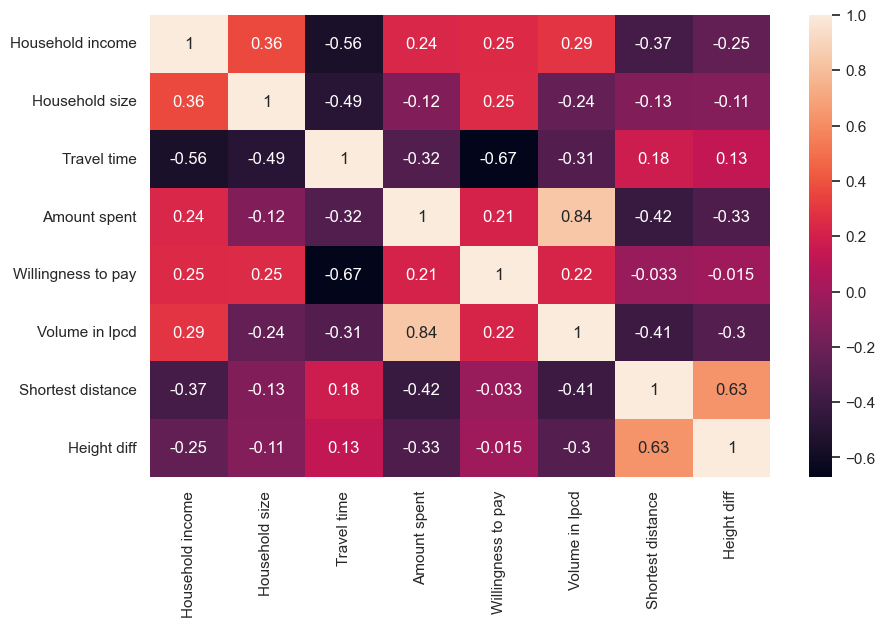

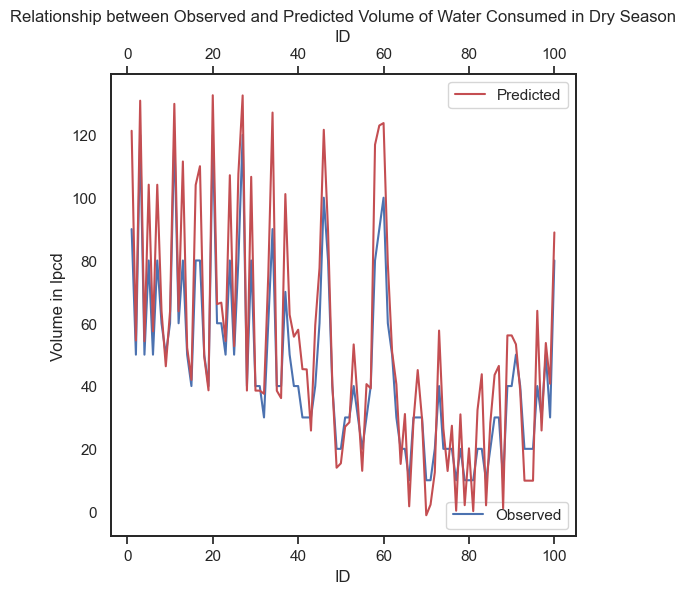

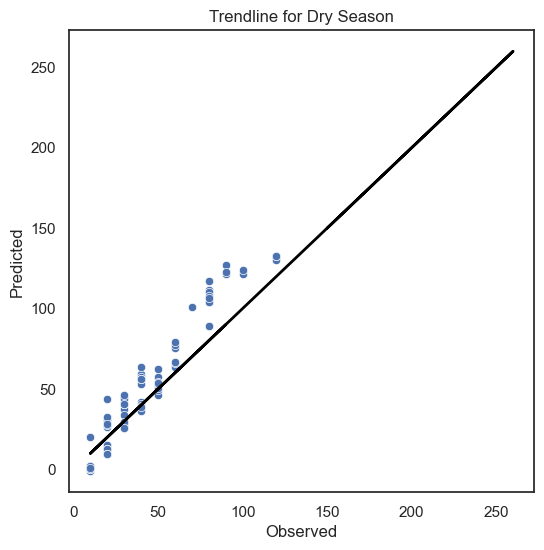

In [12]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding
data = pd.read_csv("dry_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = [ 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

# Loading the data
data_pearson = data_new.drop(columns=['ID', 
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Method_carried',
            'Method_delivered',
            'Method_inyard',
            'Method_waterboard',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'Quality_poor'], axis=1)
#Separate target variable from input variables
Xfull = data_new.drop(columns=['ID', 'Volume in lpcd'], axis=1)

yfull= data_new['Volume in lpcd']

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# FEATURE SELECTION
import pandas as pd
import numpy as np

# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)
    
# Information Gain
def information_gain(x, y):
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.feature_selection import SelectKBest
    # Determine the mutual information
    mutual_info = mutual_info_classif(x, y)
    # Select best five
    five_best = SelectKBest(mutual_info_classif, k=6)
    five_best.fit(x, y)
    index = x.columns[five_best.get_support()]
    score = five_best.scores_
    scores = pd.Series(score)
    scores.index = x.columns
    print("Information Gain", "\n", scores, "\n") 
    
# Recursive Feature Elimination
def recursive_feature_elimination(x, y):
    from sklearn. feature_selection import RFE
    from sklearn.linear_model import SGDRegressor
    model = SGDRegressor(max_iter=1000, tol=1e-3)
    rfe = RFE(model, n_features_to_select=6)
    fit = rfe.fit(x, y)
    # Representing in list form
    feature_ranking = pd.Series(fit.ranking_)
    feature_selected = pd.Series(fit.support_)
    feature_ranking.index = x.columns
    print("Recursive Feature Elimination", "\n", feature_ranking, "\n")

# Testing the feature selection code
pearson_correlation(data_pearson)
information_gain(Xfull, yfull)
recursive_feature_elimination(Xfull, yfull)


# Modeling with Selected Features
X = data_new.drop(columns=['Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume in lpcd',
            'Shortest distance',
            'Height diff',
            'Method_carried',
            'Method_delivered',
            'Method_inyard',
            'Method_waterboard',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'Quality_poor'], axis=1)

y = data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# Training MLR model
model.fit(X_train, y_train)
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)
    

# Predicting volume with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data_new, pred], axis=1))
    #Get first 100 records
    data100 = complete_data.iloc[:100]
    #print into excel csv file
    #Complete_Data_With_Prediction = complete_data.to_csv('poor_people_water_data_predicted_february.csv')
    
    # Plotting the relationship bwtween observed and predicted volume
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()
    sns.lineplot(x='ID', y='Volume in lpcd', data=data100, ax=ax, label="Observed")
    ax2 = ax.twiny()
    sns.lineplot(x='ID', y='Predicted volume', data=data100, ax=ax2, color='r', label="Predicted")
    sns.set_style("white")
    plt.title('Relationship between Observed and Predicted Volume of Water Consumed in Dry Season')
    ax.legend(loc = 'lower right')
    plt.show()
    
    # Plotting trendline
    sns.scatterplot(data=data100, x='Volume in lpcd', y='Predicted volume')
    sns.set(rc={'figure.figsize':(6, 6)})
    plt.plot(y, y, color='black', linewidth=2, label='prediction')
    sns.set_style("white")
    plt.title('Trendline for Dry Season')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100.0)
    print('Rsquare score =', r2s, "\n")
    

#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

## LASSO Regularization

{'model__alpha': 0.30000000000000004} 

[-2.73944692  3.54731296  0.28875901 -9.73170608 -1.52938612 29.63610301
  3.25721812  0.          0.          2.33298556  0.2675384  -3.05234878
 -0.4703492  -0.48687858  0.          0.72088162  0.          3.89314262
  0.48218004 -0.         -0.          0.          0.72671172  0.        ] 

[ 2.73944692  3.54731296  0.28875901  9.73170608  1.52938612 29.63610301
  3.25721812  0.          0.          2.33298556  0.2675384   3.05234878
  0.4703492   0.48687858  0.          0.72088162  0.          3.89314262
  0.48218004  0.          0.          0.          0.72671172  0.        ] 

['ID' 'Household income' 'Education' 'Household size' 'Travel time'
 'Amount spent' 'Willingness to pay' 'Garden' 'Car' 'Shortest distance'
 'Height diff' 'Method_carried' 'Method_inyard' 'Method_well'
 'Availability_not_often' 'Quality_very good'] 

['Kitchen Sink' 'ToiletWC' 'Method_delivered' 'Method_waterboard'
 'Availability_often' 'Quality_fair' 'Quality_good' '

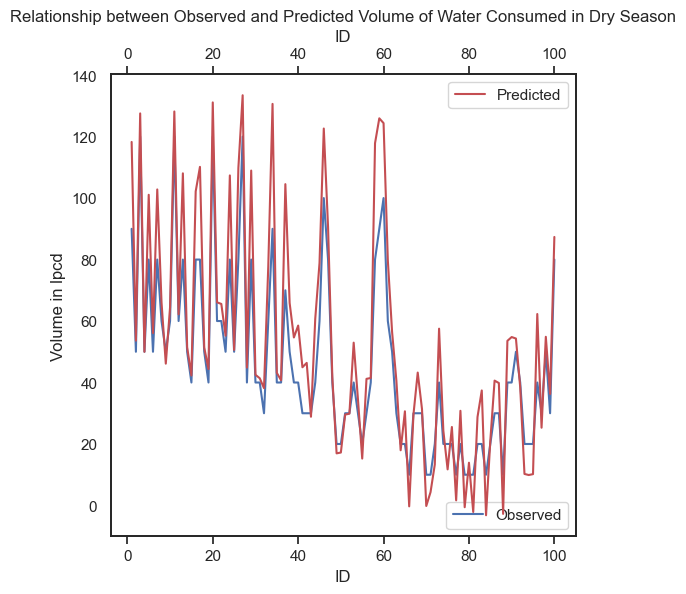

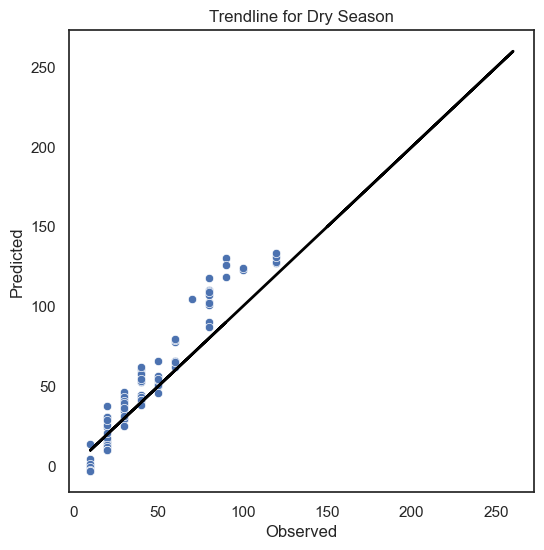

In [13]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# One-Hot Encoding
data = pd.read_csv("dry_season_data 2.csv")

encoded_data = pd.get_dummies(data, columns = [ 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)

# Loading the data
data = pd.read_csv('dry_season_data 2.csv')

features = ['ID', 
            'Household income',
            'Education',
            'Household size',
            'Travel time',
            'Amount spent',
            'Willingness to pay',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Shortest distance',
            'Height diff',
            'Method_carried',
            'Method_delivered',
            'Method_inyard',
            'Method_waterboard',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_fair',
            'Quality_good',
            'Quality_very good',
            'Quality_poor']

#Separate target variable from input variables
X = data_new.drop(columns='Volume in lpcd')

y= data_new['Volume in lpcd']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with LASSORegressor
pipeline = Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha=0.001, random_state=10))])

#Now we have to build our model, optimize its hyperparameter and train it on the training dataset.
#Now we have to optimize the α hyperparameter of Lasso regression.

#we are going to test several values from 0.1 to 10 with 0.1 step. For each value, 
#we calculate the average value of the mean squared error in a 5-folds cross-validation 
#and select the value of α that minimizes such average performance metrics. 
#We can use the GridSearchCV object for this purpose.

model = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5,verbose=0,
                      )
# We use neg_mean_squared_error because the grid search tries to maximize the performance metrics, 
# so we add a minus sign to minimize the mean squared error.

# We can now fit the model

model.fit(X_train,y_train)

#The best value for α is:

print(model.best_params_, "\n")

#Now, we have to get the values of the coefficients of Lasso regression.

coefficients = model.best_estimator_.named_steps['model'].coef_
print(coefficients, "\n")

#The importance of a feature is the absolute value of its coefficient, so:

importance = np.abs(coefficients)
print(importance, "\n")

#Print coefficients that are greater than zero
print(np.array(features)[importance > 0], "\n")

#Print coefficients that are equalto zero
print(np.array(features)[importance == 0], "\n")

#Training the model
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)
    

# Predicting volume with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data_new, pred], axis=1))
    #Get first 100 records
    data100 = complete_data.iloc[:100]
    #print into excel csv file
    #Complete_Data_With_Prediction = complete_data.to_csv('poor_people_water_data_predicted_february.csv')
    
    # Plotting the relationship bwtween observed and predicted volume
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()
    sns.lineplot(x='ID', y='Volume in lpcd', data=data100, ax=ax, label="Observed")
    ax2 = ax.twiny()
    sns.lineplot(x='ID', y='Predicted volume', data=data100, ax=ax2, color='r', label="Predicted")
    sns.set_style("white")
    plt.title('Relationship between Observed and Predicted Volume of Water Consumed in Dry Season')
    ax.legend(loc = 'lower right')
    plt.show()
    
    # Plotting trendline
    sns.scatterplot(data=data100, x='Volume in lpcd', y='Predicted volume')
    sns.set(rc={'figure.figsize':(6, 6)})
    plt.plot(y, y, color='black', linewidth=2, label='prediction')
    sns.set_style("white")
    plt.title('Trendline for Dry Season')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.show()
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and Rsquare Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('Mean absolute error = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('Root mean square error = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100.0)
    print('Rsquare score =', r2s, "\n")
    

#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)